# Original 

### https://github.com/lululxvi/deepxde/issues/384

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term




Compiling model...
Building feed-forward neural network...
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
'build' took 0.082795 s



/Users/lennartfuhrig/opt/anaconda3/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+62=62. 
  warnings.warn("The balance properties of Sobol' points require "


'compile' took 0.332514 s

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric   
0         [6.11e-04, nan]         [6.18e-04, nan]         [9.99e-01]    
1000      [2.00e-08, nan]         [2.49e-08, nan]         [1.00e+00]    
2000      [9.03e-09, nan]         [1.26e-08, nan]         [1.00e+00]    
3000      [1.59e-08, nan]         [1.61e-08, nan]         [1.00e+00]    
4000      [4.50e-10, nan]         [4.84e-10, nan]         [1.00e+00]    
5000      [1.26e-09, nan]         [1.79e-09, nan]         [1.00e+00]    
6000      [7.02e-10, nan]         [7.28e-10, nan]         [1.00e+00]    
7000      [1.20e-05, nan]         [1.20e-05, nan]         [1.00e+00]    
8000      [9.09e-06, nan]         [9.09e-06, nan]         [1.00e+00]    
9000      [1.05e-06, nan]         [1.05e-06, nan]         [1.00e+00]    
10000     [1.41e-09, nan]         [1.44e-09, nan]         [1.00e+00]    
11000     [2.14e-08, nan]         [2.13e-08, nan]   

AttributeError: 'NoneType' object has no attribute 'shape'

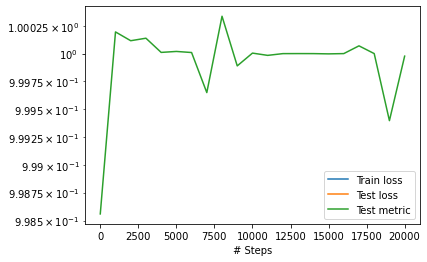

In [1]:
import deepxde as dde
import numpy as np
import tensorflow as tf

def ode_system(t, theta):
    """ODE
    theta''(t) = -g*sin(theta(t))/L
    """
    dtheta1_dt = dde.grad.jacobian(theta, t, i=0)
    dtheta2_dt = dde.grad.jacobian(dtheta1_dt, t, i=0)
    return [dtheta2_dt + tf.sin(theta)]

def boundary(_, on_initial):
    return on_initial

def func(t):
    """
    theta = cos(t)
    """
    return np.cos(t)

geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.IC(geom, np.cos, boundary, component=0)
data = dde.data.PDE(geom, ode_system, [ic1], 60, 1, solution=func, num_test=50)

layer_size = [1] + [30] * 3 + [1]
activation = "sigmoid"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.1, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=20000)

dde.saveplot(losshistory, train_state, issave=False, isplot=True)

# my pendulum

In [ ]:
def ode_system(t, theta):
    """ODE
    theta''(t) = -g*sin(theta(t))/L
    """
    #dtheta1_dt = dde.grad.jacobian(theta, t, i=0)
    #dtheta2_dt = dde.grad.jacobian(dtheta1_dt, t, i=0)
    dtheta2_dt = dde.grad.hessian(theta, t, i=0, j=0)
    return [dtheta2_dt + tf.sin(theta)]

def boundary(_, on_initial):
    return on_initial

def func(t):
    """
    theta = cos(t)
    """
    return np.cos(t)

geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.IC(geom, np.cos, boundary, component=0)
data = dde.data.PDE(geom, ode_system, [ic1], 30, 1, solution=func, num_test=50)

layer_size = [1] + [30] * 3 + [1]
activation = "sigmoid"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.1, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=20000)

dde.saveplot(losshistory, train_state, issave=False, isplot=True)